In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline

#DATA PREP
df = pd.read_csv('./data/boston_airbnb/listings.csv')

#remove columns with more than 50% missing values
missing_cols = set(df.columns[df.isnull().mean()>0.5])
df = df.drop(missing_cols, axis=1, inplace=False)

#replace "$" sign in price column, convert to numeric
df['price'] = df['price'].replace({'\$':''}, regex = True)
df['price'] = pd.to_numeric(df['price'] ,errors='coerce')

#drop rows with null prices
df.dropna(subset=['price'], axis=0)

#drop rows with prices more than $400
df = df[df['price']<=400]

print(df.shape)
print(df.columns)

(3459, 86)
Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'transit', 'access', 'interaction', 'house_rules', 'thumbnail_url',
       'medium_url', 'picture_url', 'xl_picture_url', 'host_id', 'host_url',
       'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'street',
       'neighbourhood', 'neighbourhood_cleansed', 'city', 'state', 'zipcode',
       'market', 'smart_location', 'country_code', 'country', 'latitude',
       'longitude', 'is_location_exact', 'property_type', 'room_type',
       'accommodates', 'bathrooms', 'bedrooms', 'beds', 'bed_type',
    

In [2]:

df_1 = df.groupby(['neighbourhood']).agg({'id':"count", 'price':"mean", 'review_scores_rating':"mean", 'number_of_reviews':"mean", 'latitude':"mean",'longitude':"mean"})
df_1 = df_1.rename(columns={'id': 'count'},inplace=False)
df_1 = df_1.sort_values('count', ascending=False)
print(df_1)
print(df_1.shape)


                    count       price  review_scores_rating  \
neighbourhood                                                 
Allston-Brighton      359  107.331476             90.022642   
Jamaica Plain         302  125.221854             94.451737   
South End             283  185.109541             93.008511   
Back Bay              265  214.709434             91.331707   
Fenway/Kenmore        240  196.104167             89.281250   
South Boston          198  185.949495             94.503067   
Dorchester            195   97.451282             89.579882   
Beacon Hill           165  188.151515             93.737931   
North End             122  188.770492             93.876190   
East Boston           117  124.059829             89.745283   
Roxbury               110  120.136364             90.826087   
Mission Hill          102  120.509804             87.550725   
Chinatown              78  235.410256             92.377778   
Charlestown            76  190.723684             94.16

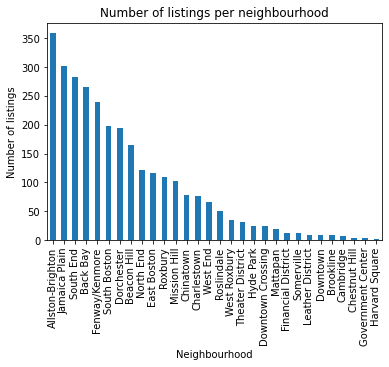

In [3]:
#number of listing by neighbourhood
df_1 = df_1.sort_values('count', ascending=False)
((df_1['count'])).plot(kind="bar", title="Number of listings per neighbourhood", xlabel="Neighbourhood", ylabel="Number of listings");

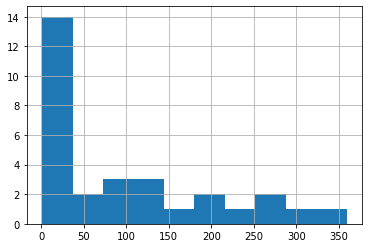

In [4]:
#histogram of number of listing by neighbourhood
df_1['count'].hist();

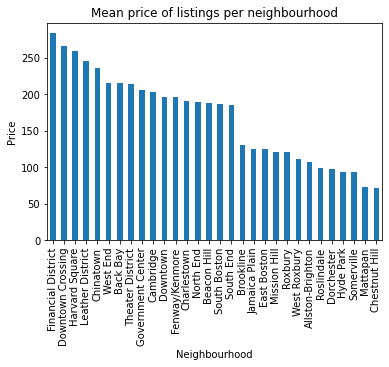

In [5]:
#mean price of listing by neighbourhood
df_1 = df_1.sort_values("price", ascending=False)
((df_1['price'])).plot(kind="bar", title="Mean price of listings per neighbourhood", xlabel="Neighbourhood", ylabel="Price");

In [6]:
print(df_1)

                    count       price  review_scores_rating  \
neighbourhood                                                 
Financial District     13  283.692308             98.250000   
Downtown Crossing      25  266.480000             91.000000   
Harvard Square          1  259.000000                   NaN   
Leather District        8  245.875000             98.400000   
Chinatown              78  235.410256             92.377778   
West End               66  215.060606             92.194444   
Back Bay              265  214.709434             91.331707   
Theater District       31  213.774194             89.333333   
Government Center       3  205.333333             92.000000   
Cambridge               7  203.000000             74.500000   
Downtown                8  196.500000             83.285714   
Fenway/Kenmore        240  196.104167             89.281250   
Charlestown            76  190.723684             94.166667   
North End             122  188.770492             93.87

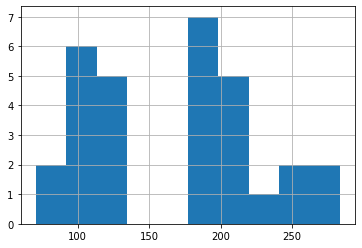

In [7]:
#histogram of mean price of listing by neighbourhood
df_1['price'].hist();

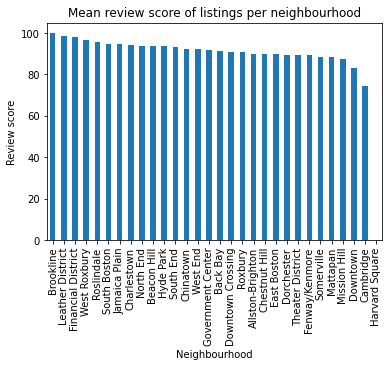

In [8]:
#mean review ratings by neighbourhood
df_1 = df_1.sort_values("review_scores_rating", ascending=False)
((df_1['review_scores_rating'])).plot(kind="bar", title="Mean review score of listings per neighbourhood", xlabel="Neighbourhood", ylabel="Review score");

In [9]:
print(df_1)

                    count       price  review_scores_rating  \
neighbourhood                                                 
Brookline               8  130.375000            100.000000   
Leather District        8  245.875000             98.400000   
Financial District     13  283.692308             98.250000   
West Roxbury           35  111.342857             96.407407   
Roslindale             50   99.160000             95.565217   
South Boston          198  185.949495             94.503067   
Jamaica Plain         302  125.221854             94.451737   
Charlestown            76  190.723684             94.166667   
North End             122  188.770492             93.876190   
Beacon Hill           165  188.151515             93.737931   
Hyde Park              25   93.680000             93.611111   
South End             283  185.109541             93.008511   
Chinatown              78  235.410256             92.377778   
West End               66  215.060606             92.19

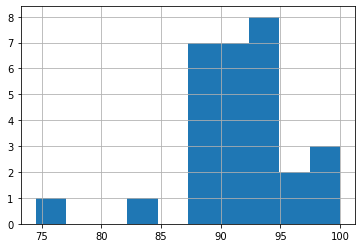

In [10]:
#histogram of review ratings by neighbourhood
df_1['review_scores_rating'].hist();

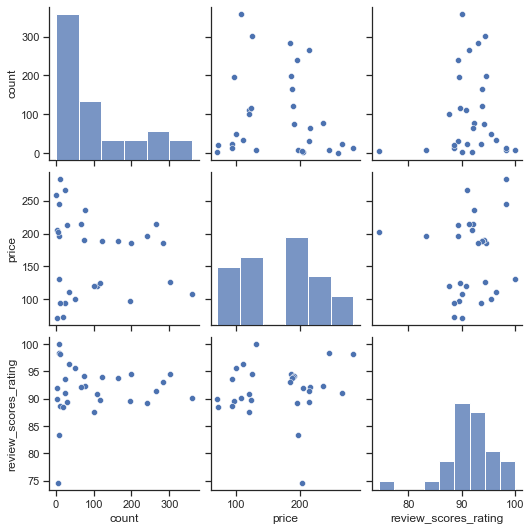

In [11]:
sns.set_theme(style="ticks")
sns.pairplot(df_1[['count','price','review_scores_rating']]);

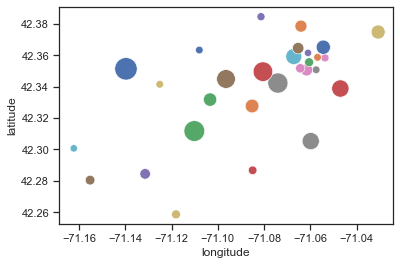

In [12]:
df_1 = df_1.sort_values("review_scores_rating", ascending=False)
sns.scatterplot(data=df_1, y="latitude", x="longitude", hue="review_scores_rating",size="count", sizes=(50, 500), palette="deep", legend=False);

In [15]:
df_2 = df_1.reset_index()

mapbox_key = 'pk.eyJ1IjoiamFjcXVlc211bGxlciIsImEiOiJja25wczZrMGswY2hkMnFuenIxdWtoNXRtIn0.yV19gFMMxl4AJSVsk7My5Q'

fig = px.scatter_mapbox(data_frame=df_2, lat="latitude", lon="longitude", color="price", size="count", hover_name='neighbourhood', zoom=10, size_max=30)

fig.update_layout(mapbox_style="light", mapbox_accesstoken=mapbox_key);

fig.show();

In [14]:
df_1.describe()

,count,price,review_scores_rating,number_of_reviews,latitude,longitude
count,30.000000,30.000000,29.000000,30.000000,30.000000,30.000000
mean,97.633333,167.957980,91.588900,16.183861,42.340237,-71.086048
std,105.163086,61.810022,4.857726,11.234391,0.032054,0.034085
min,1.000000,70.750000,74.500000,0.000000,42.258701,-71.162312
25%,13.000000,113.541234,89.579882,7.636538,42.328709,-71.109631
50%,58.000000,187.050505,92.000000,14.676024,42.350728,-71.077252
75%,154.250000,211.663978,94.166667,22.805556,42.360934,-71.060623
max,359.000000,283.692308,100.000000,39.623932,42.384542,-71.030638
